In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/06_Jun.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,56.000000,1,5,1,2705.0,2754.0,2786.0,2721.0,3006.0,2313.0,2709.083333,2634.0
1,25.916667,56.416667,1,5,1,2675.0,2746.0,2768.0,2686.0,2974.0,2307.0,2692.750000,2572.0
2,25.833333,56.833333,1,5,1,2653.0,2720.0,2731.0,2673.0,2969.0,2340.0,2678.083333,2555.0
3,25.750000,57.250000,1,5,1,2640.0,2698.0,2785.0,2644.0,2950.0,2361.0,2657.166667,2534.0
4,25.666667,57.666667,2,5,1,2634.0,2705.0,2754.0,2620.0,2918.0,2299.0,2637.583333,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,35.122450,45.925632,23,1,0,3617.0,3511.0,3446.0,3798.0,3313.0,3766.0,3555.500000,3645.0
8636,35.122450,45.925632,24,1,0,3632.0,3492.0,3457.0,3695.0,3410.0,3745.0,3576.166667,3705.0
8637,35.122450,45.925632,24,1,0,3622.0,3548.0,3436.0,3696.0,3484.0,3769.0,3601.000000,3734.0
8638,35.000000,45.925632,24,1,0,3648.0,3591.0,3467.0,3675.0,3565.0,3824.0,3626.333333,3771.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,-0.085638,-1.752976,-0.637356
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,-0.155045,-1.766669,-0.673295
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,-0.165889,-1.691357,-0.705566
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,-0.207100,-1.643431,-0.751589
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,-0.276507,-1.784926,-0.794679


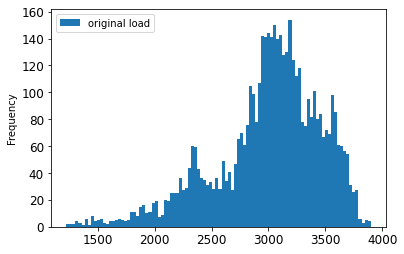

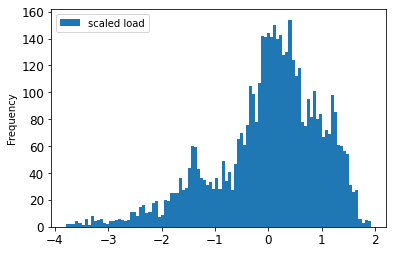

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

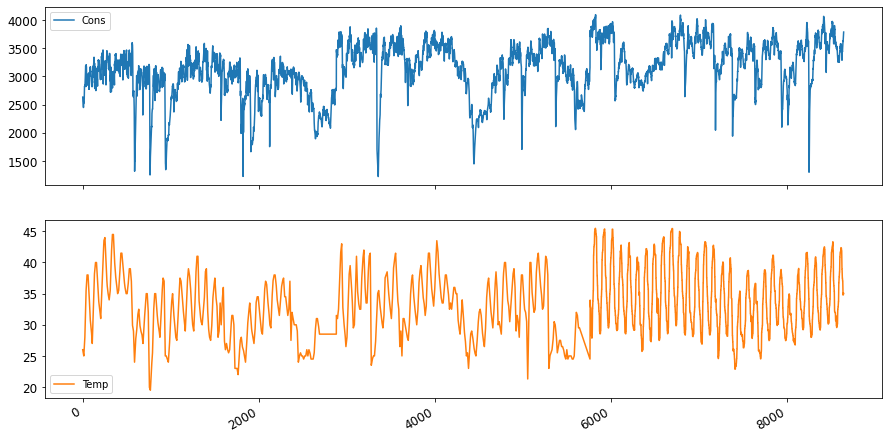

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,-0.085638,-1.752976,-0.637356,-0.909320
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,-0.155045,-1.766669,-0.673295,-0.945593
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,-0.165889,-1.691357,-0.705566,-0.990400
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,-0.207100,-1.643431,-0.751589,-1.022406
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,-0.276507,-1.784926,-0.794679,-1.028807
5,-1.028807,-1.419165,0.109643,-1.516238,0.480035,0.623519,-0.909366,-0.690586,-0.540537,-0.880301,-0.356758,-1.686792,-0.836851,-1.084283
6,-1.084283,-1.436782,0.132399,-1.516238,0.480035,0.623519,-0.945617,-0.737466,-0.595909,-0.880301,-0.306872,-1.641149,-0.879024,-1.146160
7,-1.146160,-1.454399,0.155155,-1.516238,0.480035,0.623519,-0.990398,-0.765168,-0.642762,-0.912260,-0.463038,-1.632020,-0.922480,-1.171764
8,-1.171764,-1.472016,0.177911,-1.371801,0.480035,0.623519,-1.022385,-0.777954,-0.627854,-1.046488,-0.432672,-1.689074,-0.969420,-1.146160
9,-1.146160,-1.489632,0.200666,-1.371801,0.480035,0.623519,-1.028782,-0.910072,-0.691745,-1.574877,-0.465206,-1.584094,-1.008659,-1.071481


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.777031,-1.331082,-0.004135,-1.660674,0.480035,0.623519,-0.625752,-0.522242,-0.455350,-0.628890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.777031
1,-0.909320,-1.348698,0.018621,-1.660674,0.480035,0.623519,-0.689725,-0.539290,-0.493684,-0.703461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.777031,-0.909320
2,-0.945593,-1.366315,0.041376,-1.660674,0.480035,0.623519,-0.736638,-0.594694,-0.572483,-0.731159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.777031,-0.909320,-0.945593
3,-0.990400,-1.383932,0.064132,-1.660674,0.480035,0.623519,-0.764360,-0.641574,-0.457480,-0.792947,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.777031,-0.909320,-0.945593,-0.990400
4,-1.022406,-1.401549,0.086888,-1.516238,0.480035,0.623519,-0.777155,-0.626658,-0.523500,-0.844081,...,NaN,NaN,NaN,NaN,NaN,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406
5,-1.028807,-1.419165,0.109643,-1.516238,0.480035,0.623519,-0.909366,-0.690586,-0.540537,-0.880301,...,NaN,NaN,NaN,NaN,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807
6,-1.084283,-1.436782,0.132399,-1.516238,0.480035,0.623519,-0.945617,-0.737466,-0.595909,-0.880301,...,NaN,NaN,NaN,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283
7,-1.146160,-1.454399,0.155155,-1.516238,0.480035,0.623519,-0.990398,-0.765168,-0.642762,-0.912260,...,NaN,NaN,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160
8,-1.171764,-1.472016,0.177911,-1.371801,0.480035,0.623519,-1.022385,-0.777954,-0.627854,-1.046488,...,NaN,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764
9,-1.146160,-1.489632,0.200666,-1.371801,0.480035,0.623519,-1.028782,-0.910072,-0.691745,-1.574877,...,-0.777031,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.071481,-1.507249,0.223422,-1.371801,0.480035,0.623519,-1.084225,-0.946297,-0.738598,-1.815635,...,-0.909320,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160,-1.071481
11,-1.013871,-1.524866,0.246178,-1.371801,0.480035,0.623519,-1.146066,-0.991047,-0.766283,-1.849724,...,-0.945593,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160,-1.071481,-1.013871
12,-1.016005,-1.542482,0.268933,-1.227365,0.480035,0.623519,-1.171655,-1.023011,-0.779061,-1.777284,...,-0.990400,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160,-1.071481,-1.013871,-1.016005
13,-1.016005,-1.489632,0.250729,-1.227365,0.480035,0.623519,-1.146066,-1.029404,-0.911102,-1.214805,...,-1.022406,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160,-1.071481,-1.013871,-1.016005,-1.016005
14,-1.007470,-1.436782,0.232524,-1.227365,0.480035,0.623519,-1.071430,-1.084808,-0.947306,-1.110406,...,-1.028807,-1.084283,-1.146160,-1.171764,-1.146160,-1.071481,-1.013871,-1.016005,-1.016005,-1.007470


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.013871
11,-1.016005
12,-1.016005
13,-1.007470
14,-0.962662
...,...
4795,-0.183865
4796,-0.111319
4797,0.089248
4798,0.219403


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.071481,-1.071481,-1.146160,-1.171764,-1.146160,-1.084283,-1.028807,-1.022406,-0.990400,-0.945593,...,-1.371801,0.480035,0.623519,-1.084225,-0.946297,-0.738598,-1.815635,-0.283013,-1.463138,-1.037447
11,-1.013871,-1.013871,-1.071481,-1.146160,-1.171764,-1.146160,-1.084283,-1.028807,-1.022406,-0.990400,...,-1.371801,0.480035,0.623519,-1.146066,-0.991047,-0.766283,-1.849724,-0.254817,-1.376415,-1.058900
12,-1.016005,-1.016005,-1.013871,-1.071481,-1.146160,-1.171764,-1.146160,-1.084283,-1.028807,-1.022406,...,-1.227365,0.480035,0.623519,-1.171655,-1.023011,-0.779061,-1.777284,-0.254817,-1.319361,-1.079436
13,-1.016005,-1.016005,-1.016005,-1.013871,-1.071481,-1.146160,-1.171764,-1.146160,-1.084283,-1.028807,...,-1.227365,0.480035,0.623519,-1.146066,-1.029404,-0.911102,-1.214805,-0.259155,-1.289692,-1.088604
14,-1.007470,-1.007470,-1.016005,-1.016005,-1.013871,-1.071481,-1.146160,-1.171764,-1.146160,-1.084283,...,-1.227365,0.480035,0.623519,-1.071430,-1.084808,-0.947306,-1.110406,-0.200593,-1.255460,-1.093922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,-0.296950,-0.296950,-0.424972,-0.499651,-0.497517,-0.518854,-0.614871,-0.649010,-0.755694,-0.934924,...,1.516930,-0.020106,0.623519,-0.519130,-0.935643,-1.411576,-0.168680,-1.200485,-1.768951,-0.746822
4796,-0.183865,-0.183865,-0.296950,-0.424972,-0.499651,-0.497517,-0.518854,-0.614871,-0.649010,-0.755694,...,1.661366,-0.020106,0.623519,-0.497806,-0.756645,-1.279536,0.069947,-1.172289,-1.746129,-0.652758
4797,-0.111319,-0.111319,-0.183865,-0.296950,-0.424972,-0.499651,-0.497517,-0.518854,-0.614871,-0.649010,...,1.661366,-0.020106,0.623519,-0.499938,-0.650098,-1.166663,0.202044,-1.083361,-1.730154,-0.562179
4798,0.089248,0.089248,-0.111319,-0.183865,-0.296950,-0.424972,-0.499651,-0.497517,-0.518854,-0.614871,...,1.661366,-0.020106,0.623519,-0.425303,-0.616003,-1.041012,0.295790,-0.992265,-1.600069,-0.465182


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,24,1)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,3121.0,39.750000,26.916667,1.0,5.0,1.0,2946.0,2764.0,2694.0,3197.0,2598.0,2380.0,2908.833333
4802,3104.0,39.500000,27.833333,1.0,5.0,1.0,3040.0,2799.0,2710.0,3192.0,2582.0,2386.0,2941.666667
4803,3094.0,39.250000,28.750000,1.0,5.0,1.0,3101.0,2859.0,2755.0,3189.0,2564.0,2400.0,2969.916667
4804,3073.0,39.000000,29.666667,2.0,5.0,1.0,3134.0,2912.0,2765.0,3147.0,2559.0,2405.0,2995.583333
4805,3047.0,38.750000,30.583333,2.0,5.0,1.0,3121.0,2946.0,2764.0,3136.0,2546.0,2389.0,3019.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2980.0,24.668067,81.000000,23.0,7.0,0.0,3010.0,2937.0,2816.0,2484.0,2850.0,3145.0,2949.250000
5756,3052.0,24.626050,81.000000,24.0,7.0,0.0,2918.0,2997.0,2871.0,2541.0,2926.0,3272.0,2964.333333
5757,3097.0,24.584034,81.000000,24.0,7.0,0.0,2908.0,3033.0,2859.0,2602.0,2987.0,3333.0,2984.166667
5758,3150.0,24.542017,81.000000,24.0,7.0,0.0,2946.0,3058.0,2874.0,2673.0,3094.0,3383.0,3007.166667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.099590,1.748462,-1.617440,-1.664588,0.204235,0.655141,-0.555130,-1.027568,-1.203899,0.039643,-1.774006,-1.769544,-0.684182
4802,-0.143913,1.699167,-1.575703,-1.664588,0.204235,0.655141,-0.310089,-0.936406,-1.162322,0.026089,-1.821122,-1.755410,-0.594272
4803,-0.169986,1.649873,-1.533966,-1.664588,0.204235,0.655141,-0.151073,-0.780129,-1.045387,0.017956,-1.874127,-1.722431,-0.516913
4804,-0.224738,1.600578,-1.492230,-1.519992,0.204235,0.655141,-0.065048,-0.642084,-1.019401,-0.095902,-1.888850,-1.710652,-0.446628
4805,-0.292527,1.551283,-1.450493,-1.519992,0.204235,0.655141,-0.098937,-0.553527,-1.021999,-0.125722,-1.927132,-1.748343,-0.382048
4806,-0.310778,1.501989,-1.408756,-1.519992,0.204235,0.655141,-0.143253,-0.308692,-0.931049,-0.128433,-1.953634,-1.720075,-0.327052
4807,-0.417676,1.452694,-1.367019,-1.519992,0.204235,0.655141,-0.169321,-0.149811,-0.775135,-0.188073,-1.980137,-1.769544,-0.295105
4808,-0.433319,1.403400,-1.325282,-1.375396,0.204235,0.655141,-0.224064,-0.063858,-0.637411,-0.245003,-2.044921,-1.816657,-0.276621
4809,-0.425497,1.354105,-1.283546,-1.375396,0.204235,0.655141,-0.291841,-0.097718,-0.549060,-0.212472,-2.080258,-1.800168,-0.265211
4810,-0.422890,1.304811,-1.241809,-1.375396,0.204235,0.655141,-0.310089,-0.141997,-0.304794,-0.190784,-2.039031,-1.811946,-0.275023


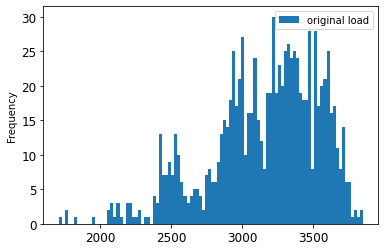

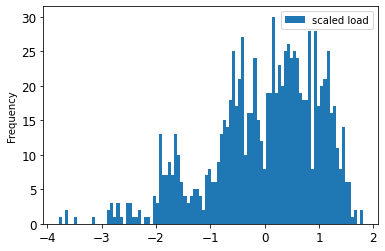

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.099590,1.748462,-1.617440,-1.664588,0.204235,0.655141,-0.555130,-1.027568,-1.203899,0.039643,-1.774006,-1.769544,-0.684182,-0.143913
4802,-0.143913,1.699167,-1.575703,-1.664588,0.204235,0.655141,-0.310089,-0.936406,-1.162322,0.026089,-1.821122,-1.755410,-0.594272,-0.169986
4803,-0.169986,1.649873,-1.533966,-1.664588,0.204235,0.655141,-0.151073,-0.780129,-1.045387,0.017956,-1.874127,-1.722431,-0.516913,-0.224738
4804,-0.224738,1.600578,-1.492230,-1.519992,0.204235,0.655141,-0.065048,-0.642084,-1.019401,-0.095902,-1.888850,-1.710652,-0.446628,-0.292527
4805,-0.292527,1.551283,-1.450493,-1.519992,0.204235,0.655141,-0.098937,-0.553527,-1.021999,-0.125722,-1.927132,-1.748343,-0.382048,-0.310778
4806,-0.310778,1.501989,-1.408756,-1.519992,0.204235,0.655141,-0.143253,-0.308692,-0.931049,-0.128433,-1.953634,-1.720075,-0.327052,-0.417676
4807,-0.417676,1.452694,-1.367019,-1.519992,0.204235,0.655141,-0.169321,-0.149811,-0.775135,-0.188073,-1.980137,-1.769544,-0.295105,-0.433319
4808,-0.433319,1.403400,-1.325282,-1.375396,0.204235,0.655141,-0.224064,-0.063858,-0.637411,-0.245003,-2.044921,-1.816657,-0.276621,-0.425497
4809,-0.425497,1.354105,-1.283546,-1.375396,0.204235,0.655141,-0.291841,-0.097718,-0.549060,-0.212472,-2.080258,-1.800168,-0.265211,-0.422890
4810,-0.422890,1.304811,-1.241809,-1.375396,0.204235,0.655141,-0.310089,-0.141997,-0.304794,-0.190784,-2.039031,-1.811946,-0.275023,-0.428105


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,-0.099590,1.748462,-1.617440,-1.664588,0.204235,0.655141,-0.555130,-1.027568,-1.203899,0.039643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099590
4802,-0.143913,1.699167,-1.575703,-1.664588,0.204235,0.655141,-0.310089,-0.936406,-1.162322,0.026089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099590,-0.143913
4803,-0.169986,1.649873,-1.533966,-1.664588,0.204235,0.655141,-0.151073,-0.780129,-1.045387,0.017956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099590,-0.143913,-0.169986
4804,-0.224738,1.600578,-1.492230,-1.519992,0.204235,0.655141,-0.065048,-0.642084,-1.019401,-0.095902,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.099590,-0.143913,-0.169986,-0.224738
4805,-0.292527,1.551283,-1.450493,-1.519992,0.204235,0.655141,-0.098937,-0.553527,-1.021999,-0.125722,...,NaN,NaN,NaN,NaN,NaN,-0.099590,-0.143913,-0.169986,-0.224738,-0.292527
4806,-0.310778,1.501989,-1.408756,-1.519992,0.204235,0.655141,-0.143253,-0.308692,-0.931049,-0.128433,...,NaN,NaN,NaN,NaN,-0.099590,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778
4807,-0.417676,1.452694,-1.367019,-1.519992,0.204235,0.655141,-0.169321,-0.149811,-0.775135,-0.188073,...,NaN,NaN,NaN,-0.099590,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676
4808,-0.433319,1.403400,-1.325282,-1.375396,0.204235,0.655141,-0.224064,-0.063858,-0.637411,-0.245003,...,NaN,NaN,-0.099590,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319
4809,-0.425497,1.354105,-1.283546,-1.375396,0.204235,0.655141,-0.291841,-0.097718,-0.549060,-0.212472,...,NaN,-0.099590,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497
4810,-0.422890,1.304811,-1.241809,-1.375396,0.204235,0.655141,-0.310089,-0.141997,-0.304794,-0.190784,...,-0.09959,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,-0.428105,1.255516,-1.200072,-1.375396,0.204235,0.655141,-0.416968,-0.168043,-0.146281,-0.215183,...,-0.143913,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890,-0.428105
4812,-0.501108,1.206221,-1.158335,-1.230800,0.204235,0.655141,-0.432609,-0.222740,-0.060529,-0.269401,...,-0.169986,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890,-0.428105,-0.501108
4813,-0.568897,1.156927,-1.143158,-1.230800,0.204235,0.655141,-0.424789,-0.290460,-0.094310,-0.394103,...,-0.224738,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890,-0.428105,-0.501108,-0.568897
4814,-0.545431,1.107632,-1.127981,-1.230800,0.204235,0.655141,-0.422182,-0.308692,-0.138486,-0.369705,...,-0.292527,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890,-0.428105,-0.501108,-0.568897,-0.545431
4815,-0.621042,1.058338,-1.112804,-1.230800,0.204235,0.655141,-0.427396,-0.415482,-0.164471,-0.366994,...,-0.310778,-0.417676,-0.433319,-0.425497,-0.422890,-0.428105,-0.501108,-0.568897,-0.545431,-0.621042


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,-0.501108
4812,-0.568897
4813,-0.545431
4814,-0.621042
4815,-0.587148
...,...
5754,-0.467214
5755,-0.279491
5756,-0.162164
5757,-0.023979


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,-0.428105,-0.428105,-0.422890,-0.425497,-0.433319,-0.417676,-0.310778,-0.292527,-0.224738,-0.169986,...,-1.375396,0.204235,0.655141,-0.416968,-0.168043,-0.146281,-0.215183,-2.112650,-1.882616,-0.299212
4812,-0.501108,-0.501108,-0.428105,-0.422890,-0.425497,-0.433319,-0.417676,-0.310778,-0.292527,-0.224738,...,-1.230800,0.204235,0.655141,-0.432609,-0.222740,-0.060529,-0.269401,-2.159765,-1.901461,-0.337321
4813,-0.568897,-0.568897,-0.501108,-0.428105,-0.422890,-0.425497,-0.433319,-0.417676,-0.310778,-0.292527,...,-1.230800,0.204235,0.655141,-0.424789,-0.290460,-0.094310,-0.394103,-2.224549,-1.948575,-0.378397
4814,-0.545431,-0.545431,-0.568897,-0.501108,-0.428105,-0.422890,-0.425497,-0.433319,-0.417676,-0.310778,...,-1.230800,0.204235,0.655141,-0.422182,-0.308692,-0.138486,-0.369705,-2.245162,-1.936796,-0.413539
4815,-0.621042,-0.621042,-0.545431,-0.568897,-0.501108,-0.428105,-0.422890,-0.425497,-0.433319,-0.417676,...,-1.230800,0.204235,0.655141,-0.427396,-0.415482,-0.164471,-0.366994,-2.227494,-1.941508,-0.453018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,-0.555860,-0.555860,-0.654936,-0.628864,-0.388996,-0.263847,-0.329029,-0.422890,-0.579326,-0.743583,...,1.516524,1.224346,-1.526388,-0.263166,-0.741060,-1.006408,-1.895949,-1.123221,-0.059331,-0.610931
5755,-0.467214,-0.467214,-0.555860,-0.654936,-0.628864,-0.388996,-0.263847,-0.329029,-0.422890,-0.579326,...,1.516524,1.224346,-1.526388,-0.388293,-0.576968,-0.886874,-1.893238,-1.031935,0.032540,-0.573506
5756,-0.279491,-0.279491,-0.467214,-0.555860,-0.654936,-0.628864,-0.388996,-0.263847,-0.329029,-0.422890,...,1.661120,1.224346,-1.526388,-0.628120,-0.420691,-0.743952,-1.738716,-0.808136,0.331709,-0.532202
5757,-0.162164,-0.162164,-0.279491,-0.467214,-0.555860,-0.654936,-0.628864,-0.388996,-0.263847,-0.329029,...,1.661120,1.224346,-1.526388,-0.654189,-0.326925,-0.775135,-1.573350,-0.628507,0.475405,-0.477891


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(948, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(948,24,1)
print(X_valid.shape)

(948, 24, 1)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal',activation='relu', dilation_rate=1,input_shape=(24,1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(Conv1D(filters=128, kernel_size=2, padding='causal',activation='relu', dilation_rate=2))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 128)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 296,577
Trainable params: 296,577
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 7s 465ms/step - loss: 34661.1523 - val_loss: 1.1986
Epoch 2/300
16/16 [==============================] - 7s 415ms/step - loss: 0.6650 - val_loss: 0.3575
Epoch 3/300
16/16 [==============================] - 7s 408ms/step - loss: 0.1490 - val_loss: 0.1241
Epoch 4/300
16/16 [==============================] - 6s 406ms/step - loss: 5.0836 - val_loss: 0.1113
Epoch 5/300
16/16 [==============================] - 6s 388ms/step - loss: 0.0948 - val_loss: 0.1323
Epoch 6/300
16/16 [==============================] - 6s 383ms/step - loss: 0.0931 - val_loss: 0.1279
Epoch 7/300
16/16 [==============================] - 6s 389ms/step - loss: 0.0841 - val_loss: 0.1143
Epoch 8/300
16/16 [==============================] - 7s 411ms/step - loss: 0.0731 - val_loss: 0.1004
Epoch 9/300
16/16 [==============================] - 6s 382ms/step - loss: 0.0639 - val_loss: 0.0895
Epoch 10/300
16/16 [==============================] - 6s 384ms/step - loss: 0.0560 - va

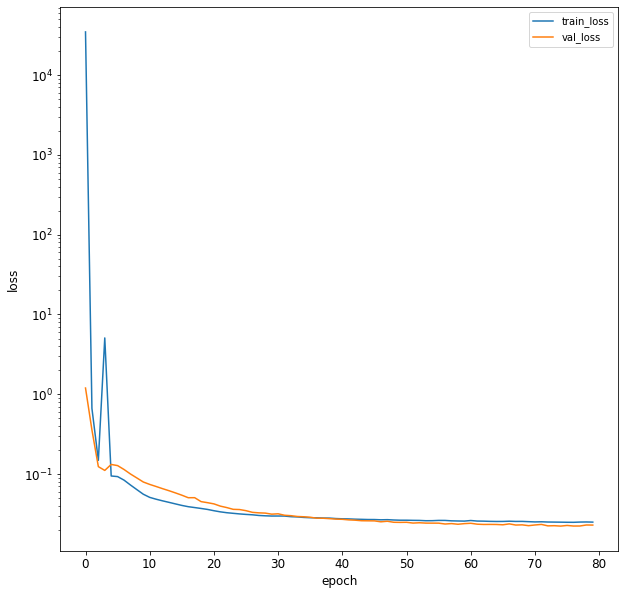

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,3736.0,33.962452,29.848862,1.0,7.0,0.0,3897.0,3968.0,3940.0,3780.0,3662.0,3573.0,3910.500000
5762,3710.0,33.422451,31.537182,1.0,7.0,0.0,3921.0,3972.0,3935.0,3721.0,3624.0,3540.0,3891.750000
5763,3792.0,32.882450,33.225502,1.0,7.0,0.0,3866.0,3961.0,3951.0,3745.0,3617.0,3567.0,3878.500000
5764,3772.0,32.882450,33.225502,2.0,7.0,0.0,3816.0,3958.0,3945.0,3752.0,3603.0,3550.0,3864.083333
5765,3783.0,32.882450,33.225502,2.0,7.0,0.0,3736.0,3897.0,3968.0,3725.0,3606.0,3552.0,3848.666667
5766,3737.0,32.782450,32.575909,2.0,7.0,0.0,3710.0,3921.0,3972.0,3797.0,3682.0,3595.0,3829.083333
5767,3800.0,32.682450,31.926315,2.0,7.0,0.0,3792.0,3866.0,3961.0,3841.0,3666.0,3592.0,3815.666667
5768,3794.0,32.682450,31.926315,3.0,7.0,0.0,3772.0,3816.0,3958.0,3821.0,3667.0,3563.0,3802.000000
5769,3789.0,32.682450,31.926315,3.0,7.0,0.0,3783.0,3736.0,3897.0,3801.0,3688.0,3587.0,3793.000000
5770,3780.0,31.047450,36.170803,3.0,7.0,0.0,3737.0,3710.0,3921.0,3838.0,3732.0,3598.0,3781.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 5761 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2879 non-null   float64
 1   Temp    2879 non-null   float64
 2   Hum     2879 non-null   float64
 3   A       2879 non-null   float64
 4   B       2879 non-null   float64
 5   C       2879 non-null   float64
 6   D       2879 non-null   float64
 7   E       2879 non-null   float64
 8   F       2879 non-null   float64
 9   G       2879 non-null   float64
 10  H       2879 non-null   float64
 11  I       2879 non-null   float64
 12  J       2879 non-null   float64
dtypes: float64(13)
memory usage: 314.9 KB


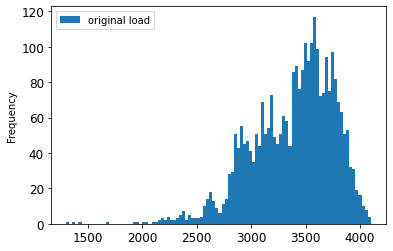

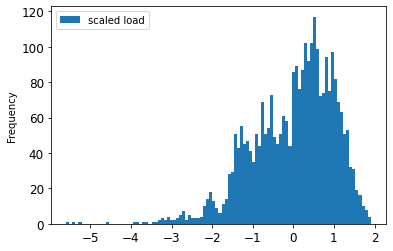

In [36]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,0.936200,-0.104855,-0.710895,-1.662410,1.441924,-1.414951,1.366714,1.553672,1.475297,0.991301,0.669646,0.437426,1.462320,0.866482
5762,0.866482,-0.207638,-0.605263,-1.662410,1.441924,-1.414951,1.431034,1.564377,1.461933,0.837198,0.571093,0.351775,1.409919,1.086360
5763,1.086360,-0.310421,-0.499631,-1.662410,1.441924,-1.414951,1.283634,1.534937,1.504697,0.899884,0.552939,0.421853,1.372889,1.032731
5764,1.032731,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,1.149633,1.526908,1.488660,0.918168,0.516630,0.377730,1.332598,1.062227
5765,1.062227,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,0.935233,1.363649,1.550133,0.847646,0.524411,0.382921,1.289513,0.938881
5766,0.938881,-0.329455,-0.540274,-1.517903,1.441924,-1.414951,0.865553,1.427882,1.560824,1.035704,0.721515,0.494526,1.234783,1.107812
5767,1.107812,-0.348489,-0.580916,-1.517903,1.441924,-1.414951,1.085313,1.280681,1.531424,1.150628,0.680020,0.486740,1.197288,1.091723
5768,1.091723,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.031713,1.146861,1.523406,1.098390,0.682613,0.411471,1.159093,1.078316
5769,1.078316,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.061193,0.932751,1.360369,1.046152,0.737076,0.473763,1.133941,1.054183
5770,1.054183,-0.659692,-0.315354,-1.373396,1.441924,-1.414951,0.937913,0.863165,1.424515,1.142792,0.851190,0.502313,1.101103,1.131945


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5761,0.936200,-0.104855,-0.710895,-1.662410,1.441924,-1.414951,1.366714,1.553672,1.475297,0.991301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.936200
5762,0.866482,-0.207638,-0.605263,-1.662410,1.441924,-1.414951,1.431034,1.564377,1.461933,0.837198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.936200,0.866482
5763,1.086360,-0.310421,-0.499631,-1.662410,1.441924,-1.414951,1.283634,1.534937,1.504697,0.899884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.936200,0.866482,1.086360
5764,1.032731,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,1.149633,1.526908,1.488660,0.918168,...,NaN,NaN,NaN,NaN,NaN,NaN,0.936200,0.866482,1.086360,1.032731
5765,1.062227,-0.310421,-0.499631,-1.517903,1.441924,-1.414951,0.935233,1.363649,1.550133,0.847646,...,NaN,NaN,NaN,NaN,NaN,0.936200,0.866482,1.086360,1.032731,1.062227
5766,0.938881,-0.329455,-0.540274,-1.517903,1.441924,-1.414951,0.865553,1.427882,1.560824,1.035704,...,NaN,NaN,NaN,NaN,0.936200,0.866482,1.086360,1.032731,1.062227,0.938881
5767,1.107812,-0.348489,-0.580916,-1.517903,1.441924,-1.414951,1.085313,1.280681,1.531424,1.150628,...,NaN,NaN,NaN,0.936200,0.866482,1.086360,1.032731,1.062227,0.938881,1.107812
5768,1.091723,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.031713,1.146861,1.523406,1.098390,...,NaN,NaN,0.936200,0.866482,1.086360,1.032731,1.062227,0.938881,1.107812,1.091723
5769,1.078316,-0.348489,-0.580916,-1.373396,1.441924,-1.414951,1.061193,0.932751,1.360369,1.046152,...,NaN,0.936200,0.866482,1.086360,1.032731,1.062227,0.938881,1.107812,1.091723,1.078316
5770,1.054183,-0.659692,-0.315354,-1.373396,1.441924,-1.414951,0.937913,0.863165,1.424515,1.142792,...,0.9362,0.866482,1.086360,1.032731,1.062227,0.938881,1.107812,1.091723,1.078316,1.054183


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5771,1.131945,-0.970895,-0.049792,-1.373396,1.441924,-1.414951,1.106753,1.082628,1.277515,1.176747,...,0.866482,1.086360,1.032731,1.062227,0.938881,1.107812,1.091723,1.078316,1.054183,1.131945
5772,1.172166,-0.970895,-0.049792,-1.228889,1.441924,-1.414951,1.090673,1.029101,1.143879,1.184583,...,1.086360,1.032731,1.062227,0.938881,1.107812,1.091723,1.078316,1.054183,1.131945,1.172166
5773,1.089042,-0.970895,-0.049792,-1.228889,1.441924,-1.414951,1.077273,1.058541,0.930061,1.106226,...,1.032731,1.062227,0.938881,1.107812,1.091723,1.078316,1.054183,1.131945,1.172166,1.089042
5774,1.341097,-1.077485,-0.003678,-1.228889,1.441924,-1.414951,1.053153,0.935427,0.860570,1.142792,...,1.062227,0.938881,1.107812,1.091723,1.078316,1.054183,1.131945,1.172166,1.089042,1.341097
5775,1.295512,-1.184074,0.042435,-1.228889,1.441924,-1.414951,1.130873,1.104039,1.079733,1.255105,...,0.938881,1.107812,1.091723,1.078316,1.054183,1.131945,1.172166,1.089042,1.341097,1.295512


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5771,1.172166
5772,1.089042
5773,1.341097
5774,1.295512
5775,1.349141
...,...
8634,0.692189
8635,0.853075
8636,0.930837
8637,1.030050


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5771,1.131945,1.131945,1.054183,1.078316,1.091723,1.107812,0.938881,1.062227,1.032731,1.086360,...,-1.373396,1.441924,-1.414951,1.106753,1.082628,1.277515,1.176747,0.846003,0.536054,1.087828
5772,1.172166,1.172166,1.131945,1.054183,1.078316,1.091723,1.107812,0.938881,1.062227,1.032731,...,-1.228889,1.441924,-1.414951,1.090673,1.029101,1.143879,1.184583,0.848596,0.515290,1.089691
5773,1.089042,1.089042,1.172166,1.131945,1.054183,1.078316,1.091723,1.107812,0.938881,1.062227,...,-1.228889,1.441924,-1.414951,1.077273,1.058541,0.930061,1.106226,0.687800,0.471167,1.102966
5774,1.341097,1.341097,1.089042,1.172166,1.131945,1.054183,1.078316,1.091723,1.107812,0.938881,...,-1.228889,1.441924,-1.414951,1.053153,0.935427,0.860570,1.142792,0.646304,0.569795,1.144188
5775,1.295512,1.295512,1.341097,1.089042,1.172166,1.131945,1.054183,1.078316,1.091723,1.107812,...,-1.228889,1.441924,-1.414951,1.130873,1.104039,1.079733,1.255105,0.908246,0.660637,1.162354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,0.700233,0.700233,0.630516,0.657330,0.617109,0.547392,0.432090,0.281929,0.332877,0.214893,...,1.516749,-1.440923,-1.414951,0.546633,0.212803,0.074789,1.142792,-0.557073,0.759265,0.423849
8635,0.692189,0.692189,0.700233,0.630516,0.657330,0.617109,0.547392,0.432090,0.281929,0.332877,...,1.516749,-1.440923,-1.414951,0.616313,0.330564,0.154971,1.038316,-0.235481,0.938353,0.470195
8636,0.853075,0.853075,0.692189,0.700233,0.630516,0.657330,0.617109,0.547392,0.432090,0.281929,...,1.661256,-1.440923,-1.414951,0.656513,0.279713,0.184371,0.769289,0.016087,0.883848,0.527952
8637,0.930837,0.930837,0.853075,0.692189,0.700233,0.630516,0.657330,0.617109,0.547392,0.432090,...,1.661256,-1.440923,-1.414951,0.629713,0.429590,0.128244,0.771901,0.208005,0.946139,0.597355


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2868, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2868, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2868,24,1)

In [45]:
predictions = model.predict(X_test)
predictions

array([[1.1503752],
       [1.1906453],
       [1.0954541],
       ...,
       [0.8216011],
       [0.9072701],
       [1.0127463]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5761][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3386.858805
dtype: float64
Cons    372.999296
dtype: float64


In [47]:
load_mean=3386.858805
load_std=372.999296
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5771,3824.075939
5772,3793.070554
5773,3887.086883
5774,3870.083930
5775,3890.087404
...,...
8634,3645.044844
8635,3705.055267
8636,3734.060304
8637,3771.066732


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3815.948 ],
       [3830.9688],
       [3795.4624],
       ...,
       [3693.3154],
       [3725.27  ],
       [3764.6125]], dtype=float32)

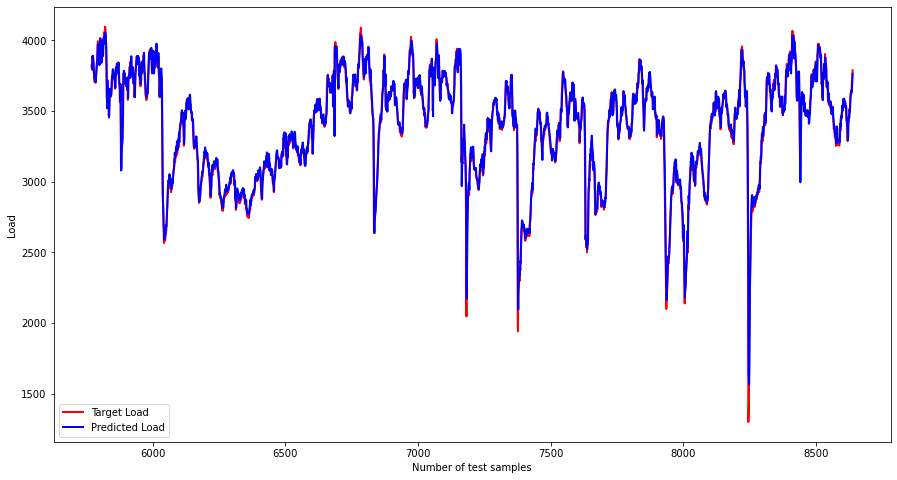

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.0937997753326425


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.367889
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5771  382307.806440
5772  379206.056226
5773  388611.045464
5774  386907.923477
5775  388909.139750
...             ...
8634  364404.526592
8635  370407.326109
8636  373307.121604
8637  377007.887614
8638  378807.631352

[2868 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5771    66.063423
5772  1436.273283
5773  8395.045481
5774   330.174656
5775   241.303214
...           ...
8634     2.370727
8635  4444.988248
8636  1660.144812
8637  2097.338865
8638   598.160012

[2868 rows x 1 columns]
y_t+1    3459.504089
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    58.817549
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2868):
    b=a[i]
    print(b)

[3815.948]
[3830.9688]
[3795.4624]
[3888.2546]
[3874.5535]
[3890.0562]
[3867.037]
[3834.793]
[3794.8613]
[3758.3672]
[3731.8096]
[3732.272]
[3711.859]
[3734.266]
[3737.6228]
[3705.877]
[3731.339]
[3767.4065]
[3781.2358]
[3813.769]
[3845.7017]
[3856.115]
[3910.7795]
[3963.0825]
[3974.9534]
[3963.6008]
[3936.5679]
[3932.8071]
[3910.0098]
[3825.5183]
[3965.9365]
[3940.634]
[4010.1968]
[4010.399]
[3933.0737]
[3909.4785]
[3888.6558]
[3844.1797]
[3902.5151]
[3948.1553]
[3996.677]
[3942.5986]
[3888.4834]
[3899.1924]
[3977.6099]
[4005.6426]
[3975.6353]
[4027.6467]
[4007.8638]
[3992.1104]
[4009.3965]
[4055.4937]
[4035.9478]
[4023.573]
[3962.0964]
[3924.3918]
[3792.555]
[3595.0693]
[3519.549]
[3718.9434]
[3653.024]
[3636.8357]
[3636.556]
[3660.9458]
[3643.742]
[3454.124]
[3470.5803]
[3553.4392]
[3629.2705]
[3616.0952]
[3637.6948]
[3657.4097]
[3608.7615]
[3610.4885]
[3620.4304]
[3654.8909]
[3716.2788]
[3745.0562]
[3737.1755]
[3769.0354]
[3796.2563]
[3785.0886]
[3777.2349]
[3758.8955]
[3733.4258]


[3127.4243]
[3106.3533]
[3142.746]
[3147.8994]
[3105.4539]
[3184.1938]
[3203.172]
[3212.019]
[3211.6665]
[3193.8247]
[3185.0835]
[3213.4436]
[3264.059]
[3331.7517]
[3327.7412]
[3349.0322]
[3347.9175]
[3321.178]
[3259.2683]
[3261.0579]
[3297.1987]
[3341.6746]
[3196.8071]
[3211.7412]
[3192.4707]
[3162.7847]
[3121.9932]
[3155.698]
[3210.7864]
[3181.7595]
[3279.3506]
[3288.1064]
[3323.7874]
[3284.9795]
[3320.5698]
[3335.4773]
[3333.1028]
[3323.141]
[3298.3982]
[3293.4707]
[3315.5637]
[3324.6238]
[3335.9836]
[3356.2302]
[3346.2173]
[3326.6895]
[3337.2278]
[3335.0938]
[3304.2935]
[3282.3254]
[3243.5159]
[3291.958]
[3336.25]
[3342.4258]
[3352.4946]
[3353.3582]
[3351.0657]
[3317.541]
[3270.5178]
[3265.6858]
[3232.0186]
[3239.6343]
[3251.4702]
[3237.304]
[3212.6387]
[3242.8667]
[3250.2996]
[3230.4915]
[3192.5706]
[3187.4958]
[3191.4836]
[3165.2507]
[3146.4368]
[3151.7295]
[3136.2056]
[3158.8384]
[3153.778]
[3122.5122]
[3202.1755]
[3225.8157]
[3205.761]
[3227.5916]
[3244.26]
[3229.4067]
[3268.08

[2296.0671]
[2173.5405]
[2396.454]
[2621.0532]
[2750.066]
[2836.2263]
[2907.3757]
[2958.94]
[2979.1216]
[2995.1362]
[2970.5554]
[2942.2004]
[3066.2368]
[3121.3289]
[3162.5479]
[3202.17]
[3231.9246]
[3244.222]
[3181.1687]
[3165.8916]
[3198.3076]
[3205.541]
[3228.1553]
[3241.7866]
[3235.0913]
[3249.0183]
[3233.214]
[3177.284]
[3119.8003]
[3089.0623]
[3091.2065]
[3083.6777]
[3084.8398]
[3085.5786]
[3082.0742]
[3098.4185]
[3085.154]
[3043.631]
[3027.632]
[3022.1077]
[3022.7307]
[3016.467]
[3001.9124]
[2977.4163]
[2974.867]
[2967.471]
[2945.3801]
[2950.0193]
[2989.7622]
[2998.9236]
[3063.8618]
[3094.8975]
[3123.3599]
[3101.4814]
[3106.892]
[3132.4514]
[3160.1145]
[3129.7258]
[3150.105]
[3162.5713]
[3181.9275]
[3195.644]
[3128.9592]
[3055.8235]
[3101.6934]
[3136.2112]
[3108.994]
[3189.955]
[3245.0918]
[3249.6406]
[3214.0964]
[3280.5967]
[3330.0037]
[3344.223]
[3312.975]
[3308.1917]
[3299.9907]
[3317.6147]
[3364.084]
[3404.4827]
[3451.775]
[3450.546]
[3426.0374]
[3386.9224]
[3373.1147]
[3387.

[2859.0234]
[2844.5347]
[2802.1506]
[2784.4465]
[2743.3586]
[2624.8105]
[2599.4253]
[2649.4556]
[2694.2615]
[2520.287]
[2409.358]
[2265.2898]
[2180.9116]
[2241.539]
[2248.8994]
[2269.644]
[2352.9746]
[2381.2258]
[2429.3135]
[2461.6123]
[2486.3127]
[2576.4414]
[2651.7625]
[2539.1035]
[2695.521]
[2793.883]
[2901.7705]
[2864.337]
[2847.4055]
[2933.1155]
[2991.3682]
[3026.62]
[3042.1587]
[3088.348]
[3147.8545]
[3139.6252]
[3139.593]
[3205.6196]
[3173.8845]
[3107.754]
[3125.2056]
[3150.247]
[3167.491]
[3179.5845]
[3130.0015]
[3060.1128]
[3029.6047]
[3008.3186]
[3027.2085]
[3058.063]
[3023.2754]
[2977.7917]
[3049.7014]
[3134.5518]
[3143.863]
[3134.5432]
[3122.8174]
[3140.2993]
[3150.3296]
[3155.5515]
[3210.5344]
[3217.2058]
[3215.5771]
[3203.9258]
[3213.1423]
[3224.9167]
[3208.3796]
[3229.5122]
[3275.1753]
[3256.3484]
[3237.2766]
[3207.786]
[3234.6375]
[3228.2207]
[3193.622]
[3162.891]
[3128.1077]
[3104.8325]
[3077.9395]
[3058.2783]
[3050.9285]
[3022.2092]
[3002.6233]
[2978.548]
[2954.3428]
